# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = './data/TarantulaNebula.jpg'

A = imread(image_path)
A.shape

(567, 630, 3)

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

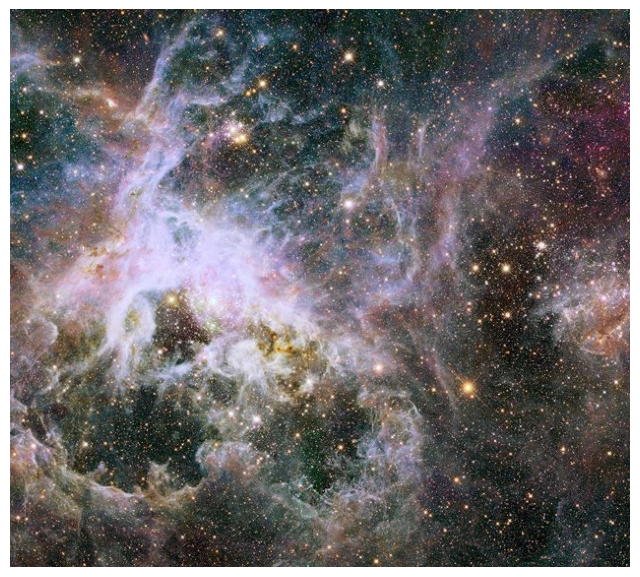

In [3]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

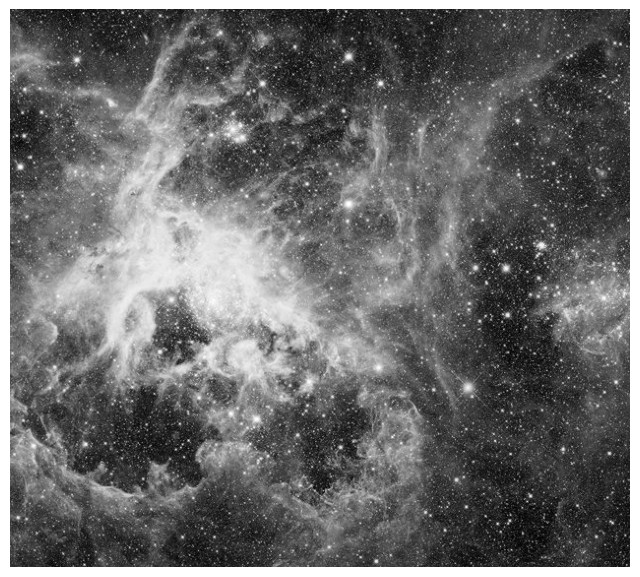

In [4]:
# compute the mean along axis in position 2 (which is the third axis)
X = np.mean(A, axis=2)
img = plt.imshow(X)
plt.axis('off')

# change the color map (just for visualization purposes: the image is already in greyscale after having computed the mean the the values)
img.set_cmap("gray")

What is the picture size?

In [5]:
X.shape

(567, 630)

Perform the SVD

In [6]:
U, s, VT = np.linalg.svd(X, full_matrices = False)
print('U shape: ', U.shape)
print('s shape: ', s.shape)
print('VT shape: ', VT.shape)

U shape:  (567, 567)
s shape:  (567,)
VT shape:  (567, 630)


build matrix S

In [7]:
S = np.diag(s)
S

array([[6.16871699e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.11695808e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.37395851e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.13764454e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.84919421e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.77164177e+01]])

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

plot of the singular values

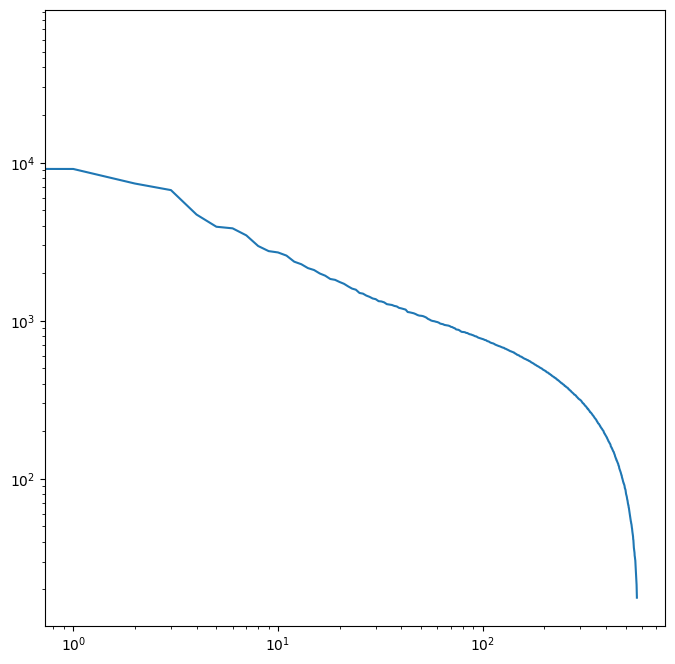

In [8]:
# plot on normal scale axes
# plt.plot(s)

# plot in logaritmic scale on both axes
plt.loglog(s)

plot the cumulate fraction of singular values

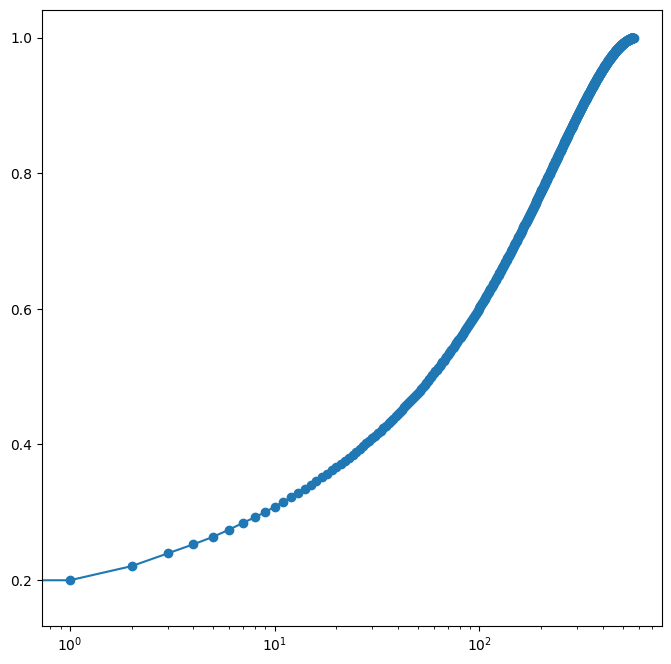

In [10]:
# s_sum = np.sum(s)
# c_sum = np.cumsum(s)

# c_fract = c_sum / sum

# plt.semilogx(c_fract, 'o-')

plt.semilogx(np.cumsum(s) / np.sum(s), 'o-')

plot the fraction of "explained variance"

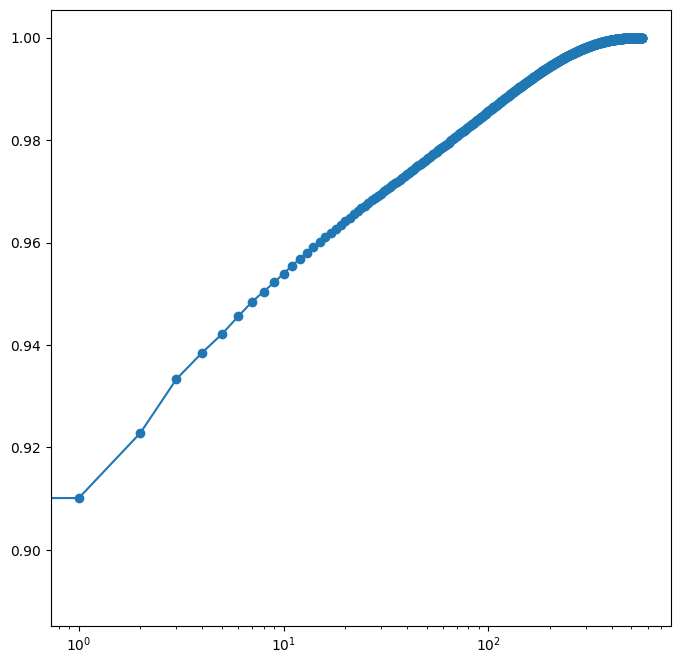

In [13]:
# s_square = np.square(s)
# s_square_sum = np.sum(s_square)
# s_square_c_sum = np.cumsum(s_square)
# s_square_c_fract = s_square_c_sum / s_square_sum

# plt.semilogx(s_square_c_fract, 'o-')

plt.semilogx(np.cumsum(s**2) / np.sum(s**2), 'o-')

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

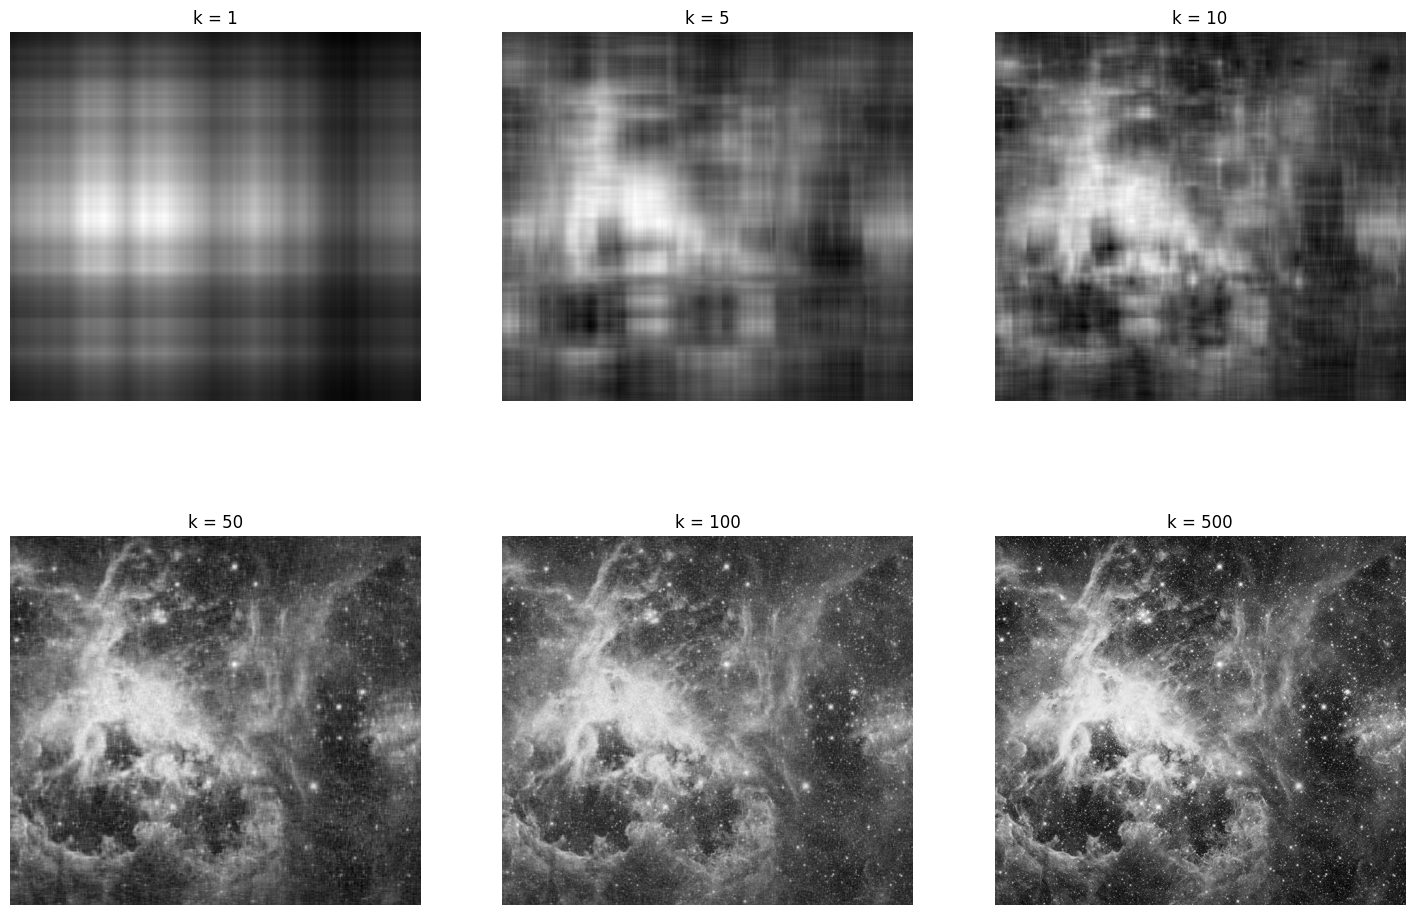

In [15]:
# consider only the first k elements
k_arr = [1,5,10,50,100,500]

fig, axs = plt.subplots(2,3, figsize=(18,12))
axs = axs.flatten()
plt.set_cmap("gray")

for i in range(len(k_arr)):
    k = k_arr[i]
    # create the best rank k approximation of matrix by multiplying the first k-th colummns of U 
    # related to the first k-th singular values (matrix sigma) with the first k-th rows of VT
    Xk = U[:,:k] @ np.diag(s[:k]) @ VT[:k,:]
    axs[i].imshow(Xk)
    axs[i].set_title("k = %d"% k)
    axs[i].set_axis_off()
    



Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

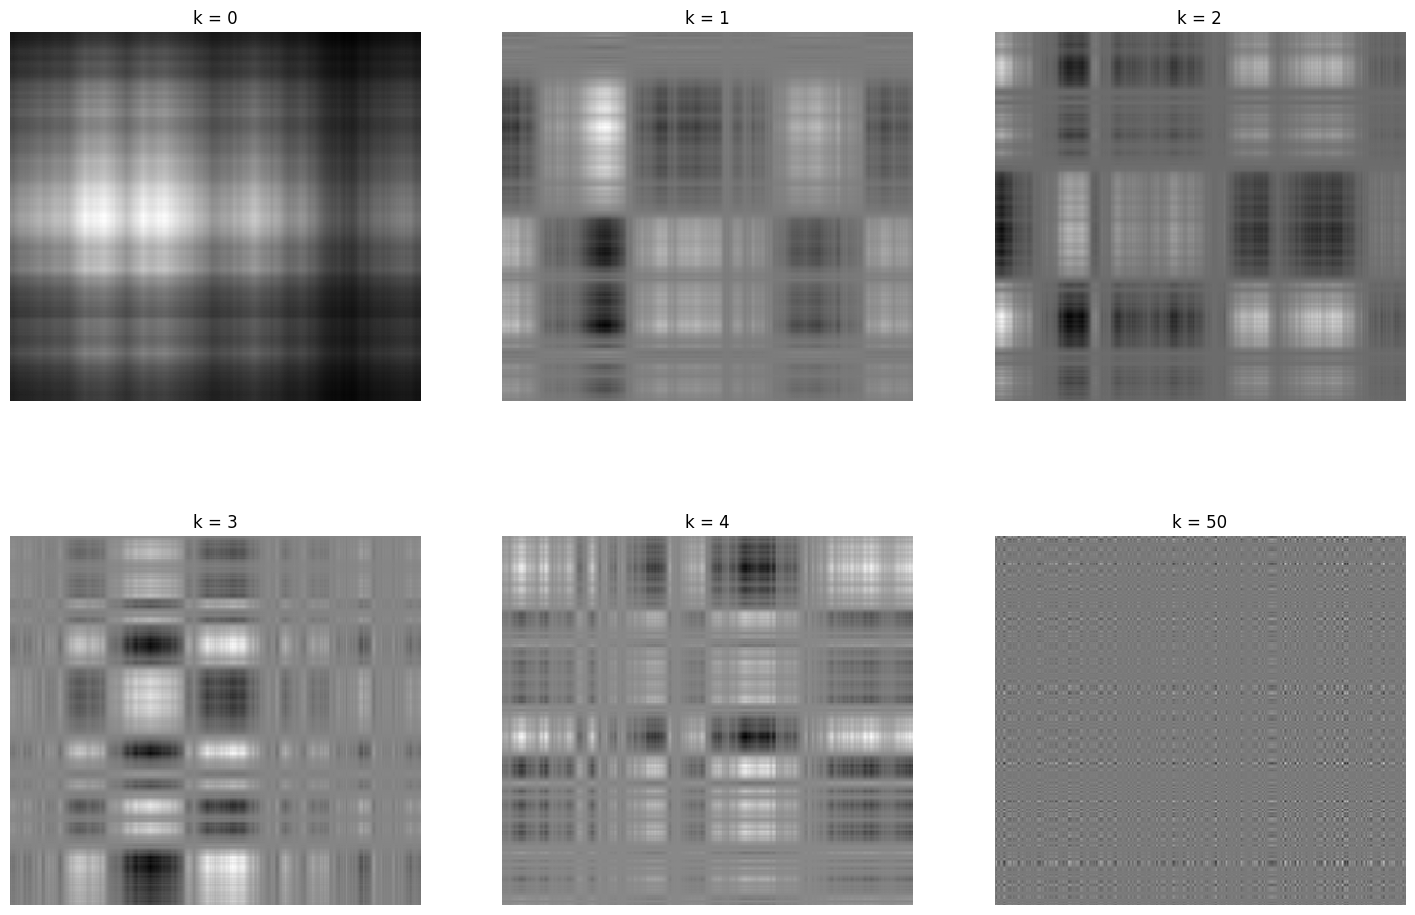

In [14]:
# consider only the first k elements
# k_arr = np.arange(1,7,1)

k_arr = [0,1,2,3,4,50]

fig, axs = plt.subplots(2,3, figsize=(18,12))
axs = axs.flatten()
plt.set_cmap("gray")

for i in range(len(k_arr)):
    k = k_arr[i]
    # outer product between k-th column of U and k-th row of VT (so it's the k-th column of V)
    Xk = np.outer(s[k]*U[:,k], VT[k,:])
    axs[i].imshow(Xk)
    axs[i].set_title("k = %d"% k)
    axs[i].set_axis_off()

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [ ]:
def randomized_SVD(A, k):
  ...
  return ...

Set $k=100$ and compute the randomized SVD of the picture used above.

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.